In [249]:
#This is the implementation of the prophet model on our dataset
import pandas as pd
from prophet import Prophet

# Load data
df = pd.read_csv("archive/Stocks/aapl.us.txt")

# Rename columns to Prophet's expected names
df = df.rename(columns={"Date": "ds", "Close": "y"})

import datetime

# convert dates from string to numerical lowers MAE and MSE
df['ds'] = pd.to_datetime(df['ds'])

import matplotlib.pyplot as plt
low = {'mae': 0, 'i': 0}
for i in range(100, len(df), 500):
    print(i)
    # split the data into training and testing sets
    train = df.iloc[:i]
    test = df.iloc[i:]
    test = test.reset_index(drop=True)

    # Initialize Prophet model
    model = Prophet()

    model.add_seasonality(name='weekly', period=7, fourier_order=15)

    # Fit model to training data
    model.fit(train)

    # make predictions on the test data
    predictions = model.predict(test)
    mae = mean_absolute_error(test['y'], predictions['yhat'])
    if i == 100:
        low['mae'] = mae
        low['i'] = i
    
    if mae < low['mae']:
        low['mae'] = mae
        low['i'] = i

print(low)

100


15:41:14 - cmdstanpy - INFO - Chain [1] start processing
15:41:14 - cmdstanpy - INFO - Chain [1] done processing


600


15:41:23 - cmdstanpy - INFO - Chain [1] start processing
15:41:24 - cmdstanpy - INFO - Chain [1] done processing


1100


15:41:32 - cmdstanpy - INFO - Chain [1] start processing
15:41:34 - cmdstanpy - INFO - Chain [1] done processing


1600


15:41:41 - cmdstanpy - INFO - Chain [1] start processing
15:41:43 - cmdstanpy - INFO - Chain [1] done processing


2100


15:41:50 - cmdstanpy - INFO - Chain [1] start processing
15:41:53 - cmdstanpy - INFO - Chain [1] done processing


2600


15:42:01 - cmdstanpy - INFO - Chain [1] start processing
15:42:04 - cmdstanpy - INFO - Chain [1] done processing


3100


15:42:12 - cmdstanpy - INFO - Chain [1] start processing
15:42:16 - cmdstanpy - INFO - Chain [1] done processing


3600


15:42:24 - cmdstanpy - INFO - Chain [1] start processing
15:42:31 - cmdstanpy - INFO - Chain [1] done processing


4100


15:42:38 - cmdstanpy - INFO - Chain [1] start processing
15:42:45 - cmdstanpy - INFO - Chain [1] done processing


4600


15:42:52 - cmdstanpy - INFO - Chain [1] start processing
15:42:59 - cmdstanpy - INFO - Chain [1] done processing


5100


15:43:05 - cmdstanpy - INFO - Chain [1] start processing
15:43:25 - cmdstanpy - INFO - Chain [1] done processing


5600


15:43:31 - cmdstanpy - INFO - Chain [1] start processing
15:43:43 - cmdstanpy - INFO - Chain [1] done processing


6100


15:43:49 - cmdstanpy - INFO - Chain [1] start processing
15:44:04 - cmdstanpy - INFO - Chain [1] done processing


6600


15:44:09 - cmdstanpy - INFO - Chain [1] start processing
15:44:20 - cmdstanpy - INFO - Chain [1] done processing


7100


15:44:25 - cmdstanpy - INFO - Chain [1] start processing
15:44:45 - cmdstanpy - INFO - Chain [1] done processing


7600


15:44:50 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing


8100


15:45:17 - cmdstanpy - INFO - Chain [1] start processing
15:45:39 - cmdstanpy - INFO - Chain [1] done processing


{'mae': 14.898297574295828, 'i': 7100}


' # Plot the predicted and actual values\nplt.plot(predictions[\'ds\'], predictions[\'yhat\'], label=\'Predicted\')\nplt.plot(predictions[\'ds\'], test[\'y\'], label=\'Actual\')\nplt.legend()\nplt.show()\n\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\n# evaluate performance\nmae = mean_absolute_error(test[\'y\'], predictions[\'yhat\'])\nprint("MAE:", mae)\nmse = mean_squared_error(test[\'y\'], predictions[\'yhat\'])\nprint("Mean Squared Error:", mse)\n\nprint(train)\nprint(test) '

15:55:35 - cmdstanpy - INFO - Chain [1] start processing
15:55:52 - cmdstanpy - INFO - Chain [1] done processing


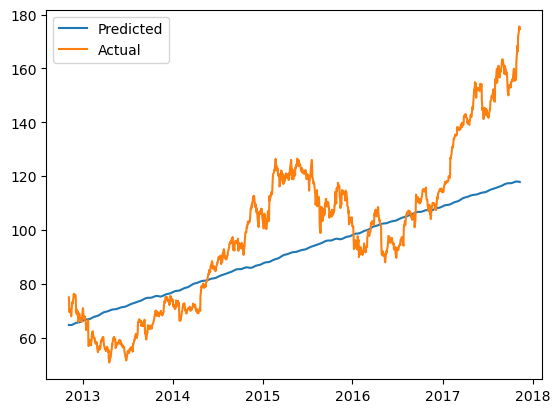

MAE: 14.898297574295828
MSE: 364.14405584379165
RMSE: 19.082558943804987


In [257]:
# split the data into training and testing sets
""" train = df.iloc[:7100]
test = df.iloc[7100:] """

test = test.reset_index(drop=True)

# Initialize Prophet model
model = Prophet()

model.add_seasonality(name='weekly', period=7, fourier_order=15)

# Fit model to training data
model.fit(train)

# make predictions on the test data
predictions = model.predict(test)

# Plot the predicted and actual values
plt.plot(predictions['ds'], predictions['yhat'], label='Predicted')
plt.plot(predictions['ds'], test['y'], label='Actual')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# evaluate performance
mae = mean_absolute_error(test['y'], predictions['yhat'])
print("MAE:", mae)
mse = mean_squared_error(test['y'], predictions['yhat'])
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)